In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.callbacks import CSVLogger
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras import backend
import matplotlib.pyplot as plt
import csv
import pylab
import time

# Set the error log level - removes warning messages
tf.get_logger().setLevel('ERROR')
# Setup the figure size for plots
pylab.rcParams['figure.figsize'] = (13.0, 5.0)

# Setup some Globals
# Acceptable model tolerance
TOLERANCE = 0.1
# Number of Epochs
EPOCHS = 10
# Print the tensorflow version
print("Tensorflow version",tf.__version__)

2023-03-31 19:09:54.494092: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-31 19:09:54.527358: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-31 19:09:54.527870: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-31 19:09:54.991238: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Tensorflow version 2.12.0


In [8]:
# Path to training or evaluation file
INPUT_FILE = 'train.csv'
# Path to model file - weights will be saved here
MODEL_FILE = "model"
# Model log file
LOG_FILE = 'train-log.csv'
# Array for the input features
trainx = []
# Array for the output labels/features
trainy = []

# Load inputs and labels from disk
# NOTE: assumes 2 inputs followed by 1 label
# NOTE: files assumed to be located in a data directory
with open(INPUT_FILE, 'r') as csvfile:
    input_data = csv.reader(csvfile, delimiter=',')
    for row in input_data:
        trainx.append([float(row[0]), float(row[1]),float(row[2]),float(row[3])])
        trainy.append([float(row[4])])

# the four different states of the XOR gate
training_data = np.array(trainx, "float32")
# the four expected results in the same order
target_data = np.array(trainy, "float32")

# print('Training inputs ', trainx)
# print('Desired outputs ', trainy)

In [9]:
# Clear any exiting network models
backend.clear_session()
# Setup a standard feed-forward network
model = Sequential()
# Setup the input layer 4 inputs with 10 connections to hidden nodes
# The threshold function used will be sigmoid
model.add(Dense(10, input_dim=4, activation='sigmoid', use_bias=True))
# Setup the output layer with 1 node using sigmoid
model.add(Dense(1, activation='sigmoid'))
# Setup the learning algorithm - Standard Gradient Descent with learning rate and momentum
opt = SGD(learning_rate=0.45, momentum=0.7)
# Compile/build the model
model.compile(optimizer= opt, loss='mse', metrics=['accuracy'])

In [10]:
# Setup a log file for the model metrics error and accuracy
csv_logger = CSVLogger('train-log.csv')
# Start a timer to time the training
start = time.time()
# Train the model
model.fit(training_data, target_data, epochs=EPOCHS, verbose=0, callbacks=[csv_logger])
# End the timer
end = time.time() - start
print("Training finished...in ", end, " seconds.")
# Save the model to file
model.save(MODEL_FILE)

Training finished...in  0.6584556102752686  seconds.


In [5]:
print(model.predict(training_data))


125/125 [==============================] - 0s 428us/step
[[0.96497995]
 [0.00898446]
 [0.98249984]
 ...
 [0.00865042]
 [0.01311436]
 [0.97772926]]


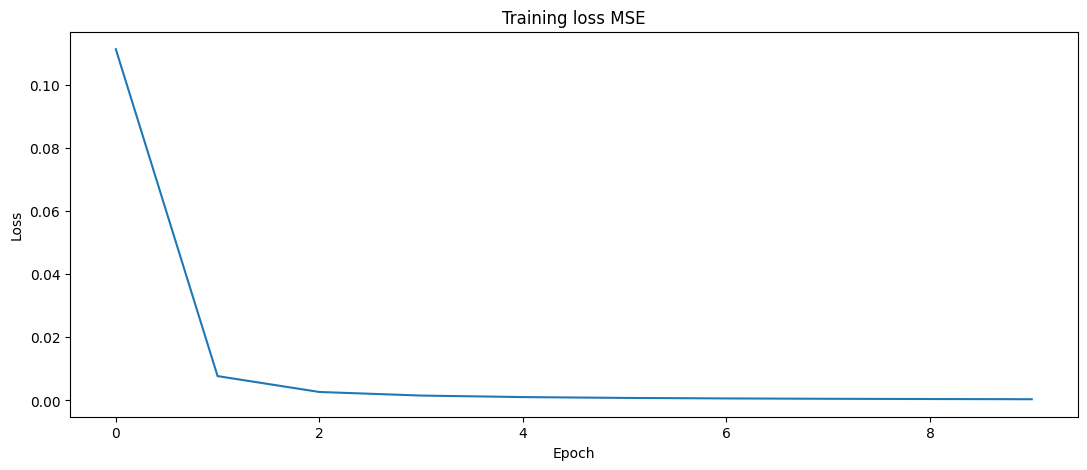

In [7]:
# Load the training log file and graph the reduction in error/loss
import pandas as pd
import matplotlib.pyplot as plt

training_df = pd.read_csv('train-log.csv')

# Plot the model error during training
ax = training_df['loss'].plot(title='Training loss MSE')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.savefig("training_mse.pdf")